In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib import offsetbox

import numpy as np
import pandas as pd

from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE
from sklearn.decomposition import PCA

from sklearn.datasets import make_swiss_roll
import plotly.graph_objects as go




import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

df = pd.read_csv(os.path.join(path, os.listdir(path)[-2]))
df.head()


/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_bis=df[:2000]
target = df_bis['label']
data = df_bis.drop('label',axis=1)

lle = LocallyLinearEmbedding(n_neighbors=50, n_components=2, method='modified', random_state = 42)
dataLLE = lle.fit_transform(data)










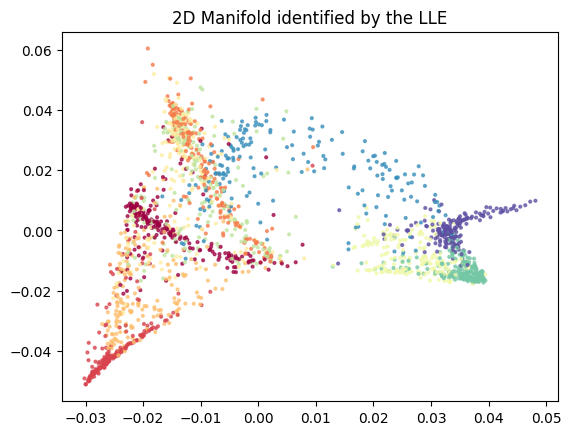

In [4]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(dataLLE[:, 0], dataLLE[:, 1],  c = target, cmap=plt.cm.Spectral, alpha = .7, s = 4)

#ax.set_xlabel('LL 1')
#ax.set_ylabel('LL 2')

ax.set_title("2D Manifold identified by the LLE")
plt.show()

In [5]:
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray_r', prefit = False):
    ax = ax or plt.gca()
    
    if not prefit :
        proj = model.fit_transform(data)
    else:
        proj = data
    ax.plot(proj[:, 0], proj[:, 1], '.b')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # We don't show points too close 
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)



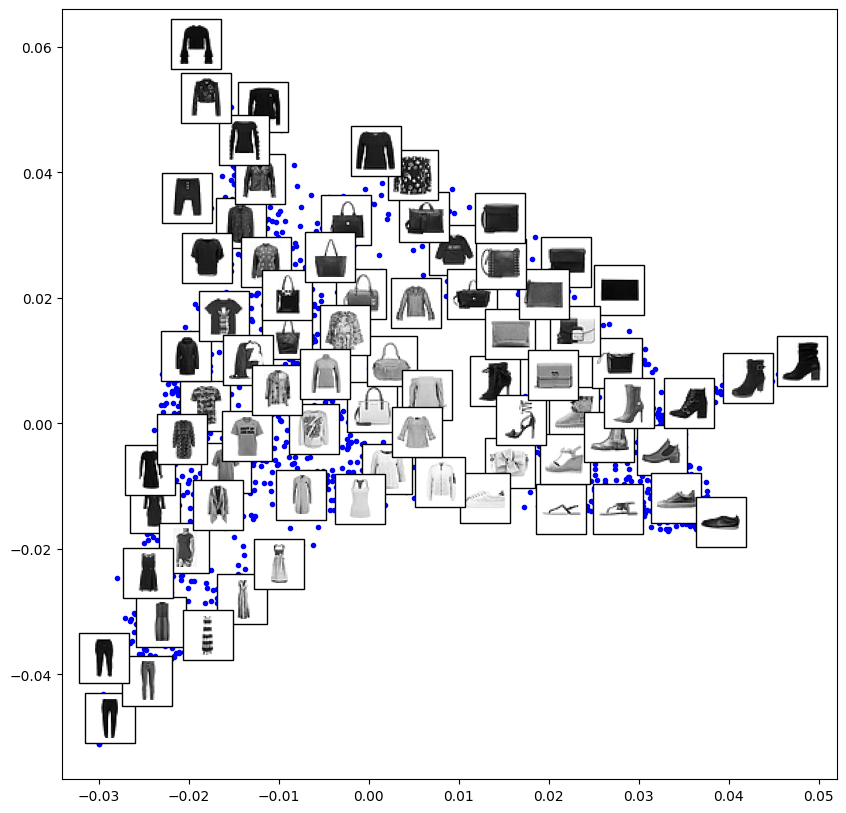

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(data = dataLLE, model = lle, images=data.values.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, prefit = True)


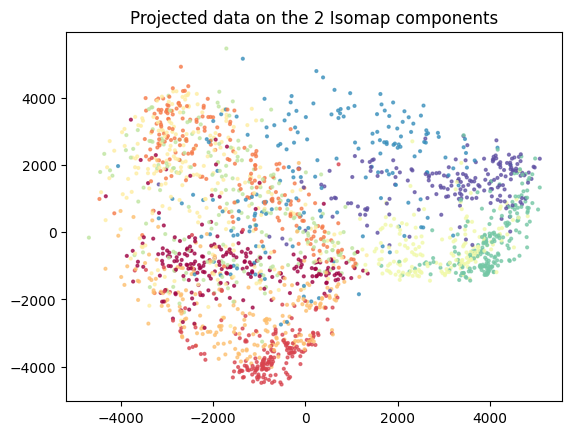

In [8]:
isomap = Isomap(n_neighbors=50, n_components=2)
dataISO = isomap.fit_transform(data)

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(dataISO[:, 0], dataISO[:, 1],  c = target, cmap=plt.cm.Spectral, alpha = .7, s = 4)

ax.set_title("Projected data on the 2 Isomap components")
plt.show()


In [9]:
tsne = TSNE(n_components=2, method = 'barnes_hut')
dataTSNE = tsne.fit_transform(data)


/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


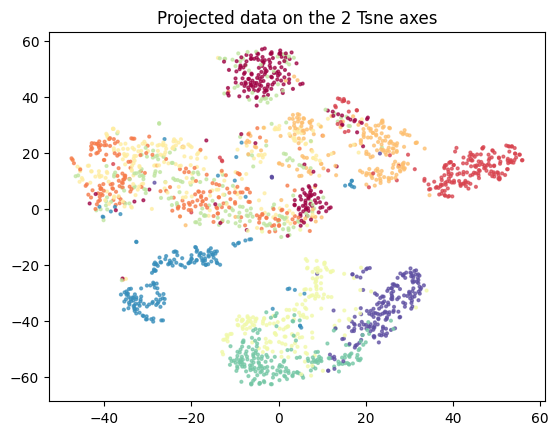

In [10]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(dataTSNE[:, 0], dataTSNE[:, 1],  c = target, cmap=plt.cm.Spectral, alpha = .7, s = 4)

ax.set_title("Projected data on the 2 Tsne axes")
plt.show()

in addition to separating classes, the algorithm captures the variance within a class and distributes the points in a cluster accordingly

/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


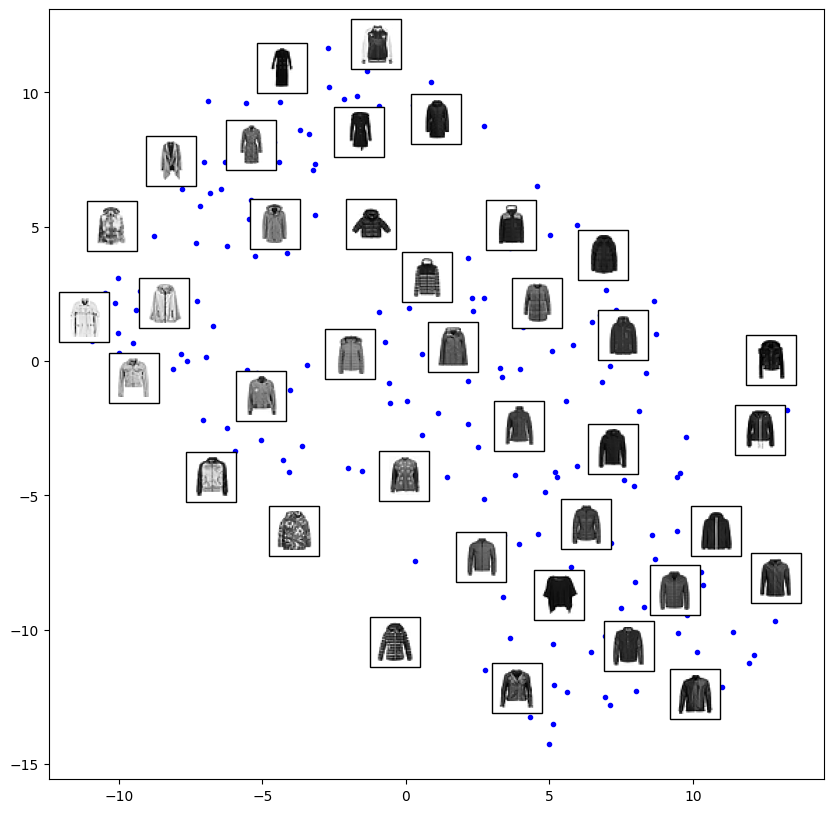

In [11]:
data_mant = data[target == 4]
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(data_mant, tsne, images=data_mant.values.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.1, cmap='gray_r')

In [23]:
import umap.umap_ as umap
umap_model = umap.UMAP(n_neighbors = 15, min_dist = 0.1, n_components=2)
embedding = umap_model.fit_transform(data)


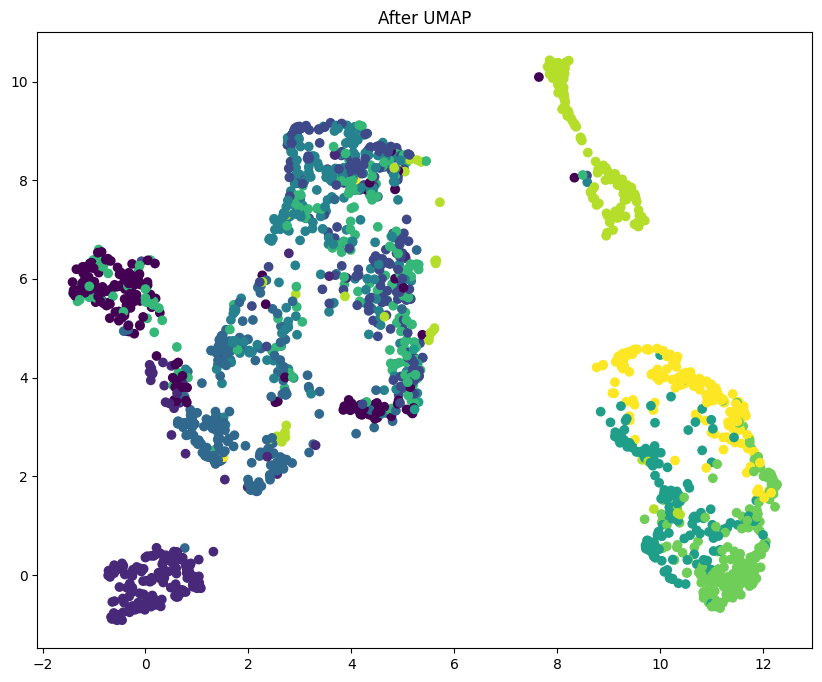

In [24]:
plt.figure(figsize = (10,8))
plt.scatter(embedding[:, 0], embedding[:, 1], c = target)
plt.title("After UMAP")
plt.show()

In [27]:
import umap.plot
mapper = umap.UMAP(n_neighbors = 15, min_dist = 0.1, n_components = 2).fit(data)
umap.plot.points(mapper, labels=target)

/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/umap/plot.py:20: UserWarning: The umap.plot package requires extra plotting libraries to be installed.
    You can install these via pip using

    pip install umap-learn[plot]

    or via conda using

     conda install pandas matplotlib datashader bokeh holoviews colorcet scikit-image
    
  warn(


ImportError: umap.plot requires pandas matplotlib datashader bokeh holoviews scikit-image and colorcet to be installed

In [28]:
from sklearn.datasets import load_digits

digits = load_digits()

embedding = umap.UMAP().fit_transform(digits.data)
embedding_bis =  umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(digits.data)

import umap.plot
mapper = umap.UMAP().fit(digits.data)
umap.plot.points(mapper, labels=digits.target)



/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/umap/plot.py:20: UserWarning: The umap.plot package requires extra plotting libraries to be installed.
    You can install these via pip using

    pip install umap-learn[plot]

    or via conda using

     conda install pandas matplotlib datashader bokeh holoviews colorcet scikit-image
    
  warn(


ImportError: umap.plot requires pandas matplotlib datashader bokeh holoviews scikit-image and colorcet to be installed